In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [3]:
# Simple Pandas example
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [85, 90, 88]
})
print("DataFrame:")
print(df)
print("\nDataFrame info:")
print(df.describe())

DataFrame:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     90
2  Charlie   35     88

DataFrame info:
        Age      Score
count   3.0   3.000000
mean   30.0  87.666667
std     5.0   2.516611
min    25.0  85.000000
25%    27.5  86.500000
50%    30.0  88.000000
75%    32.5  89.000000
max    35.0  90.000000


In [4]:
# Simple NumPy example
arr = np.array([1, 2, 3, 4, 5])
print("NumPy array:", arr)
print("Mean:", np.mean(arr))
print("Standard deviation:", np.std(arr))

NumPy array: [1 2 3 4 5]
Mean: 3.0
Standard deviation: 1.4142135623730951


In [5]:
# Simple PyTorch example
tensor = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print("Tensor:", tensor)
print("Tensor sum:", tensor.sum().item())
print("Tensor mean:", tensor.mean().item())
print("Tensor shape:", tensor.shape)

Tensor: tensor([1., 2., 3., 4., 5.])
Tensor sum: 15.0
Tensor mean: 3.0
Tensor shape: torch.Size([5])


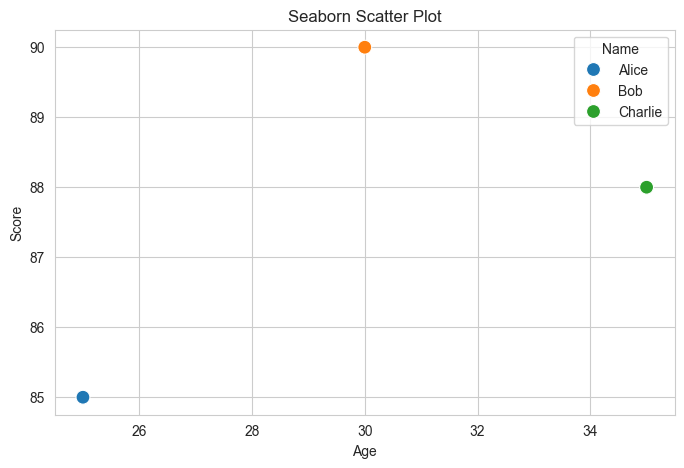

In [6]:
# Simple seaborn example
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Score', hue='Name', s=100)
plt.title('Seaborn Scatter Plot')
plt.show()

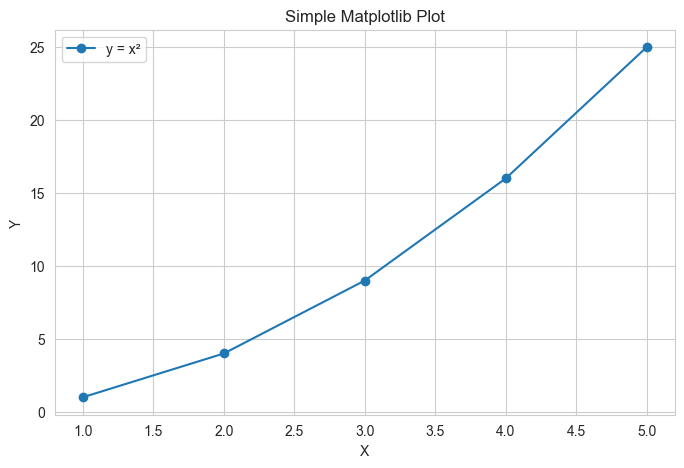

In [7]:
# Simple matplotlib example
plt.figure(figsize=(8, 5))
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25], marker='o', label='y = x²')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Matplotlib Plot')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Simple scikit-learn example
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=10, n_features=1, noise=10, random_state=42)
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
print("R² Score:", r2_score(y, predictions))
print("Predictions:", predictions[:5])

R² Score: 0.6448166041414749
Predictions: [-11.91111497 -18.79120438   6.90259447 -13.9026378  -13.90297884]


In [11]:
# Import California Housing Dataset
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

print("Dataset shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:", california_housing.feature_names)

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

Dataset shape: (20640, 8)
Target shape: (20640,)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
